<a href="https://colab.research.google.com/github/priyathamsetti/abc/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of clusters: 2
Cluster labels: [ 0  1  1  0  1  1  0  0  0 -1  0  1 -1  0  0  0  0  0 -1  1  0 -1  0  0
  0  0 -1  0  1 -1  0  0  0 -1  1  1  1  0  1  1  0 -1  0  0  0 -1 -1  0
  0  0  0 -1 -1 -1  0  0 -1  0  0 -1 -1  1  0  0  0  0  0  0  0 -1  0  0
 -1  0  1  0  1 -1  0  0  0  0  0  0  0  0  1  0  0 -1  0  1  0  0 -1  0
 -1  0  1 -1  0  0  1  1  1  1  0 -1  1  0  0  0  0 -1  1 -1  0 -1  0  1
  1  0  1 -1  0  1  0  0  0 -1 -1  0  0  0  0 -1  0  0 -1  1 -1 -1  1 -1
  0  1  0 -1  0  1  0  1 -1 -1  0  0  0  0 -1  0  0  0  0 -1 -1  1  0  0
  0  0  1  0 -1  0  0  1  0  0  1  1  1  0 -1  0  0  0  0  0  0  0  0 -1
  0  1 -1  0  0 -1  0  0 -1  0  0  1  0  0  0 -1  0  1  0 -1  1 -1  0  1
  1  0  0  0  1 -1  0  0 -1  1  0  0  1  0  1 -1  0  0  0  0  0  1 -1  0
  1  0 -1  1  0  0 -1  1  0 -1  0  0  1  1  1  1  0  0 -1  0 -1  1  0  1
  1  1  0  0  1  0  0  0  1  1  1  0  0 -1  0 -1 -1  0  0 -1 -1  0  0  0
  0  0  0  0  0  1  1 -1  0  1  0 -1]
['r', 'b', 'g', 'y']


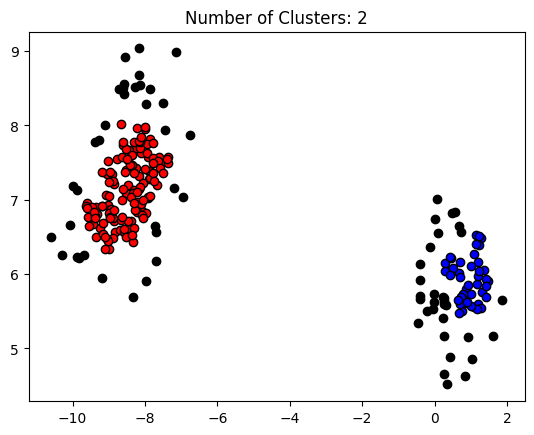

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
# Generate synthetic data using make_blobs
X, y_true = make_blobs(n_samples=300, cluster_std=0.50)
# Instantiate DBSCAN with epsilon=0.3 and min_samples=10
db = DBSCAN(eps=0.3, min_samples=10)
# Fit DBSCAN to the data
db = db.fit(X)
# Create a boolean mask to identify core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Retrieve the labels assigned to each data point
labels = db.labels_
# Count the number of clusters (excluding noise points)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Print the number of clusters and the cluster labels
print("Number of clusters:", n_clusters_)
print("Cluster labels:", labels)
# Set of unique labels assigned by DBSCAN
unique_labels = set(labels)
# Define colors for each cluster
colors = ['r', 'b', 'g', 'y']
# Print the list of colors
print(colors)
# Iterate over each unique label and corresponding color
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Assign black color to noise points
    col = 'k'
  # Create a boolean mask to identify points belonging to the current cluster
  class_member_mask = (labels == k)
  # Plot core points of the current cluster
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
# Plot non-core points of the current cluster
xy = X[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
# Set the title of the plot to display the number of clusters
plt.title('Number of Clusters: %d' % n_clusters_)
# Display the plot
plt.show()


In [3]:
import pandas as pd
# Load the Titanic dataset (assuming it's saved as a CSV file)
titanic_df = pd.read_csv('/content/titanic.csv')
# Display the first few rows of the dataset print("Loaded Dataset:")
print(titanic_df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1)



In [5]:
missing_data = titanic_df.isnull().sum()
print("\nMissing Data:")
print(missing_data)

# Drop rows with missing values (in this example, we drop rows with any missing values)
titanic_df_cleaned = titanic_df.dropna()

# impute missing values using the mean or median or ffill
titanic_df_cleaned = titanic_df.fillna(titanic_df.ffill())

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(titanic_df_cleaned.head(10))



Missing Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cleaned Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs